# このノートの目的
- ## このノートは、深層学習、並びに機械学習を再復習するために記述している。
- 今後は、Webアプリに実装していくことを前提に考えている。

In [14]:
import numpy as np
import scipy as sp
import sys,os

# 深層学習　入門

## 目次
- 公式
- 使用例

## 公式
- 内積

In [15]:
X=np.array([
    [1.0,3.0],
    [2.0,5.0],
])
Y=np.array([
    [3.0,4.0],
    [1.0,7.0],
])

In [16]:
X*Y # この計算が何かについて調べておく

array([[ 3., 12.],
       [ 2., 35.]])

In [18]:
X@Y # 内積

array([[ 6., 25.],
       [11., 43.]])

In [30]:
def sigmoid(x):
    return 1/(1.0+np.exp(-x))
def relu(x):
    return np.maximum(0,x)

In [31]:
X.dot(Y) # 内積（2つ目）

array([[ 6., 25.],
       [11., 43.]])

## 活性化関数

- 活性化関数とは、深層学習におけるシナプスの役割を果たしている、
- 活性化関数において、有名な関数としては **シグモイド関数**, **ReLu関数**が有名である.<br/>

$$
 sigmoid(x)=\frac{1.0}{1.0+\exp(-x)}
$$
<br/>
$$
 ReLu(x)=\begin{cases}
     x\quad x\geqq0\\
     0\quad x<0\\
 \end{cases}
$$ 

In [32]:
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

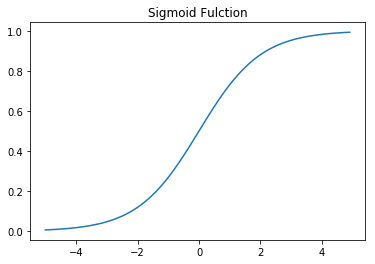

In [65]:
x=np.arange(-5,5,0.1)
y=sigmoid(x)
plt.plot(x,y)
plt.title('Sigmoid Fulction')
plt.show()

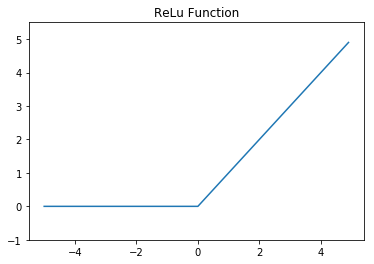

In [66]:
y=relu(x)
plt.plot(x,y)
plt.title('ReLu Function')
plt.ylim(-1,5.5)
plt.show()

In [67]:
print('X=',sigmoid(X))
print('Y=',sigmoid(Y))

X= [[0.73105858 0.95257413]
 [0.88079708 0.99330715]]
Y= [[0.95257413 0.98201379]
 [0.73105858 0.99908895]]


In [68]:
print('X=',relu(X))
print('Y=',relu(Y))

X= [[1. 3.]
 [2. 5.]]
Y= [[3. 4.]
 [1. 7.]]


# 深層学習　実装編

In [69]:
class Affine:
    def __init__(self,W,b):
        self.W=W
        self.b=b
        self.x=None
        self.dW=None
        self.db=None
        
    def forward(self,x):
        self.x=x
        out=np.dot(x,self.W)+self.b
        return out 
    def backward(self,dout):
        dx=np.dot(dout,self.W.T)
        self.dW=np.dot(self.x.T,dout)
        self.db=np,sum(dout,axis=0)
        return dx
    

In [70]:
class Sigmoid:
    def __init__(self):
        self.out=None
    
    def forward(self,x):
        out=1.0/(1.0+np.exp(-x))
        self.out=out # この実装法はとても重要！！（誤差伝播法につなげるために、値を一時保管しながらも、値を返す方法！）
        return out
    
    def backward(self,x):
        dx=x*(1.0-self.out)*self.out
        return dx

In [71]:
class Relu:
    def __init__(self):
        self.mask=None
        
    def forward(self,x):
        self.mask=(x<=0)
        out=x.copy()
        out[self.mask]=0
        return out
    
    def backward(self,dout):
        dout[self.mask]=0
        dx=dout
        return dx

## SoftMax 関数
- ソフトマックス関数は、ディープラーニングの計算結果の精度を計算するためによく利用される関数である。
- 計算式は以下の通り。<br>
$$
  sigmoid(x)=\frac{exp(x)}{\sum(exp(x))}
$$

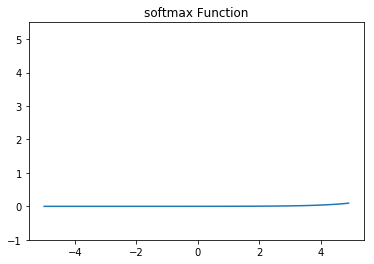

In [72]:
# ソフトマックス関数を図示化してみる
def softmax(x):
    exp_a=np.exp(x)
    sum_exp_a=np.sum(exp_a)
    y= exp_a/sum_exp_a
    return y
y=softmax(x)
plt.plot(x,y)
plt.title('softmax Function')
plt.ylim(-1,5.5)  
plt.show()

上の図表からわかる通り、ソフトマックス関数は、主に分類によく使われる関数である。

## 損失関数